In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split


In [2]:
uniRank = pd.read_csv('qs-world-university-rankings-2017-to-2022-V2.csv')

In [3]:
uniRank.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [4]:
uniRank.shape

(6482, 15)

In [5]:
uniRank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

In [6]:
uniRank.describe()

,year,score,student_faculty_ratio
count,6482.000000,2820.000000,6407.000000
mean,2019.693613,46.595532,13.264554
std,1.716683,18.813110,6.604294
min,2017.000000,23.500000,1.000000
25%,2018.000000,31.800000,9.000000
50%,2020.000000,40.600000,12.000000
75%,2021.000000,58.025000,17.000000
max,2022.000000,100.000000,67.000000


In [7]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(uniRank)

Your selected dataframe has 15 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
score,3662,56.5
city,178,2.7
international_students,164,2.5
faculty_count,78,1.2
student_faculty_ratio,75,1.2
rank_display,68,1.0
type,12,0.2
research_output,2,0.0
size,2,0.0


#### Since only very less number of rows are missing data in the below columns, I am dropping them.

In [8]:
uniRank = uniRank.dropna(subset=['city','international_students','faculty_count','student_faculty_ratio','rank_display','type','research_output','size'])

In [9]:
uniRank

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6477,Université de Tunis,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...,Public,High,17.0,57,L,"1,174"
6478,Université de Tunis El Manar,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...,Public,Very High,8.0,585,L,"3,504"
6479,Yarmouk University,2022,1201,NaN,https://www.topuniversities.com/universities/y...,Jordan,Irbid,Asia,https://www.topuniversities.com/sites/default/...,Public,Medium,31.0,"2,826",XL,"1,113"
6480,Yildiz Technical University,2022,1201,NaN,https://www.topuniversities.com/universities/y...,Turkey,Istanbul,Asia,https://www.topuniversities.com/sites/default/...,Public,High,20.0,"2,394",XL,"1,688"


In [10]:
missing_values_table(uniRank)

Your selected dataframe has 15 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
score,3365,55.3


#### Although the "score" column might be highly helpful for analysis, roughly 56% of its data are missing. So, I am also dropping this column

In [11]:
uniRank = uniRank.drop(['link','logo','score'],axis=1)

In [12]:
uniRank

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,United States,Cambridge,North America,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,United States,Stanford,North America,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,United States,Cambridge,North America,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,United Kingdom,Cambridge,Europe,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,United States,Pasadena,North America,Private,Very High,2.0,692,S,968
...,...,...,...,...,...,...,...,...,...,...,...,...
6477,Université de Tunis,2022,1201,Tunisia,Tunis,Africa,Public,High,17.0,57,L,"1,174"
6478,Université de Tunis El Manar,2022,1201,Tunisia,Tunis,Africa,Public,Very High,8.0,585,L,"3,504"
6479,Yarmouk University,2022,1201,Jordan,Irbid,Asia,Public,Medium,31.0,"2,826",XL,"1,113"
6480,Yildiz Technical University,2022,1201,Turkey,Istanbul,Asia,Public,High,20.0,"2,394",XL,"1,688"


In [13]:
uniRank['student_faculty_ratio'].replace(',','',regex=True,inplace = True)
uniRank['international_students'].replace(',','',regex= True,inplace = True)
uniRank['faculty_count'].replace(',','',regex= True,inplace = True)
uniRank['rank_display'].replace('-','',regex= True,inplace = True)

In [14]:
uniRank['student_faculty_ratio'] = uniRank['student_faculty_ratio'].astype(float)
uniRank['international_students'] = uniRank['international_students'].astype(float)
uniRank['faculty_count'] = uniRank['faculty_count'].astype(float)
uniRank['rank_display'] = uniRank['rank_display'].astype(float)

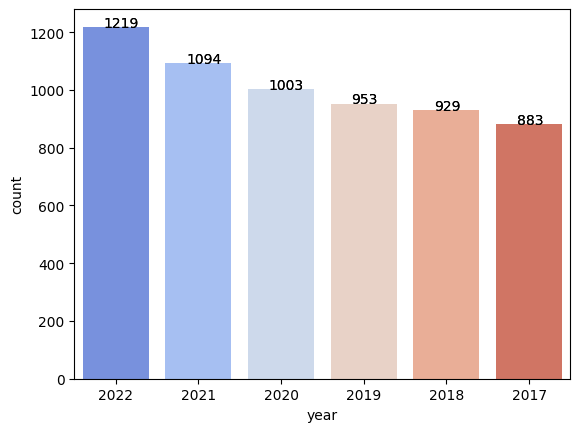

In [15]:
ax = sns.countplot(data=uniRank, x='year',order = uniRank['year'].value_counts().index,palette='coolwarm')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

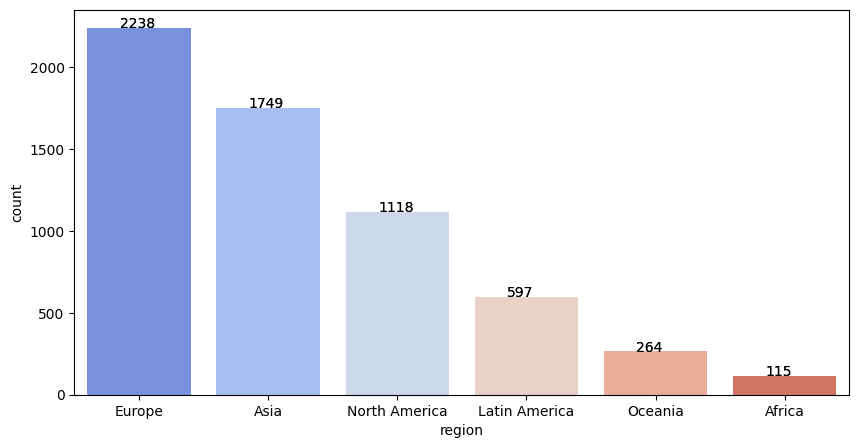

In [16]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=uniRank, x='region',order = uniRank['region'].value_counts().index,palette='coolwarm');
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

([<matplotlib.patches.Wedge at 0x12ee9a9b0>,
 [Text(-0.9234187207997966, 0.5977439803766053, 'Public'),
  Text(0.9234187207997966, -0.5977439803766054, 'Private')],
 [Text(-0.5036829386180708, 0.3260421711145119, '81.7%'),
  Text(0.5036829386180708, -0.32604217111451195, '18.3%')])

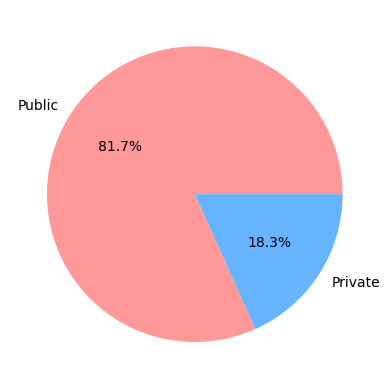

In [17]:
pie_bar_colors = ['#ff9999','#66b3ff']

plt.pie(uniRank['type'].value_counts().values,labels = uniRank['type'].value_counts().index,autopct='%1.1f%%',colors=pie_bar_colors)

In [18]:
uniRank['research_output'] = uniRank['research_output'].replace('Very high','Very High')

In [19]:
uniRank['research_output'].value_counts()

Very High    4338
High         1330
Medium        370
Low            43
Name: research_output, dtype: int64

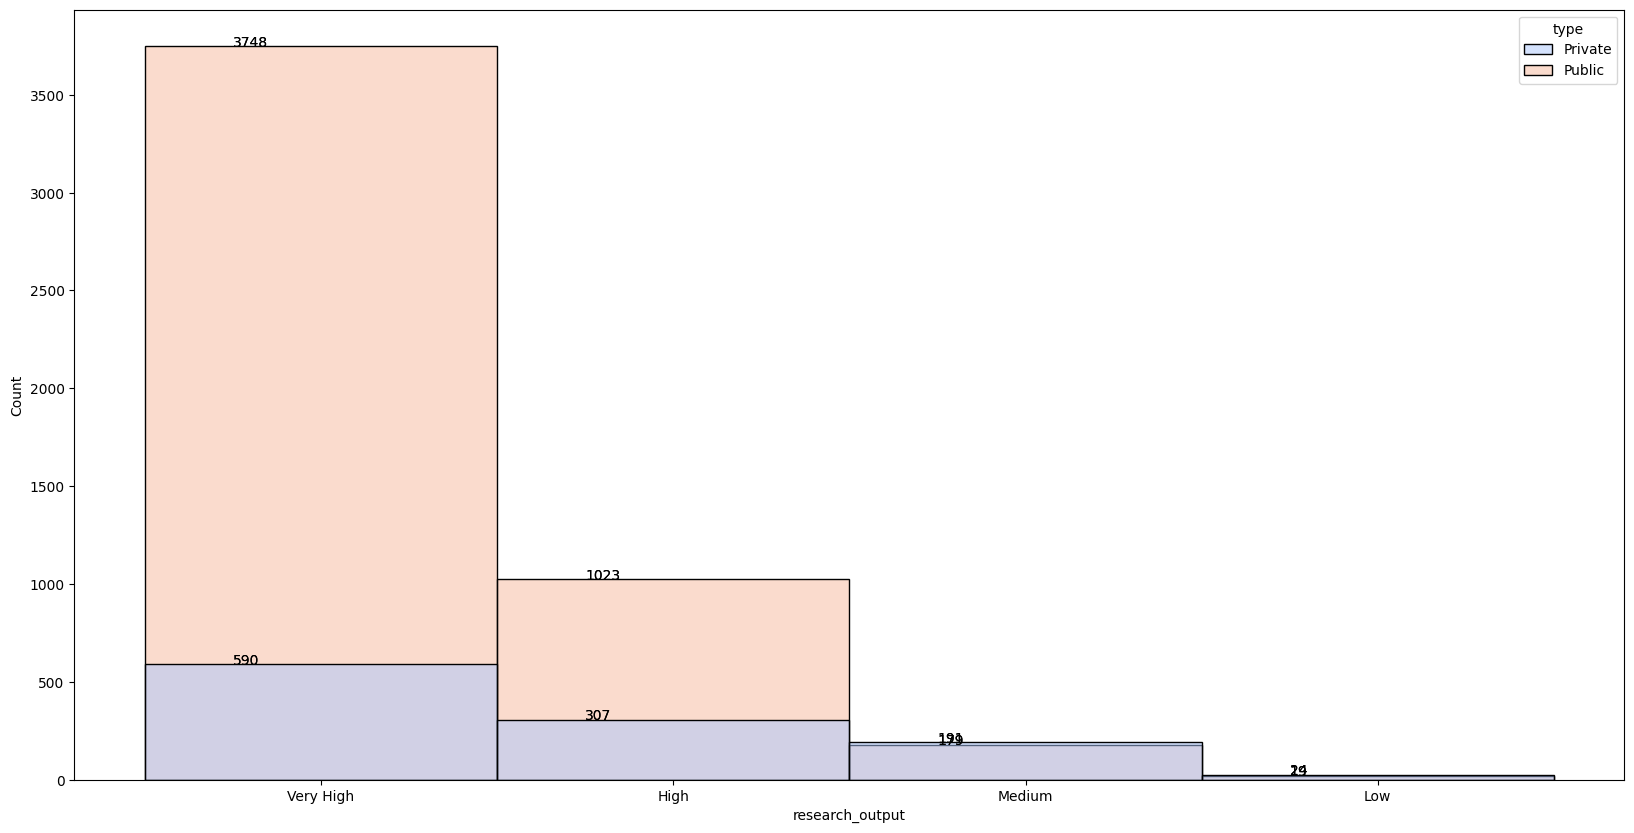

In [22]:
plt.figure(figsize=(20,10))
ax = sns.histplot(binwidth=2,
            x='research_output',
            hue='type',
            data=uniRank,
            stat="count",
            element = 'bars',
            palette='coolwarm')
sns.move_legend(ax, "upper right")

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

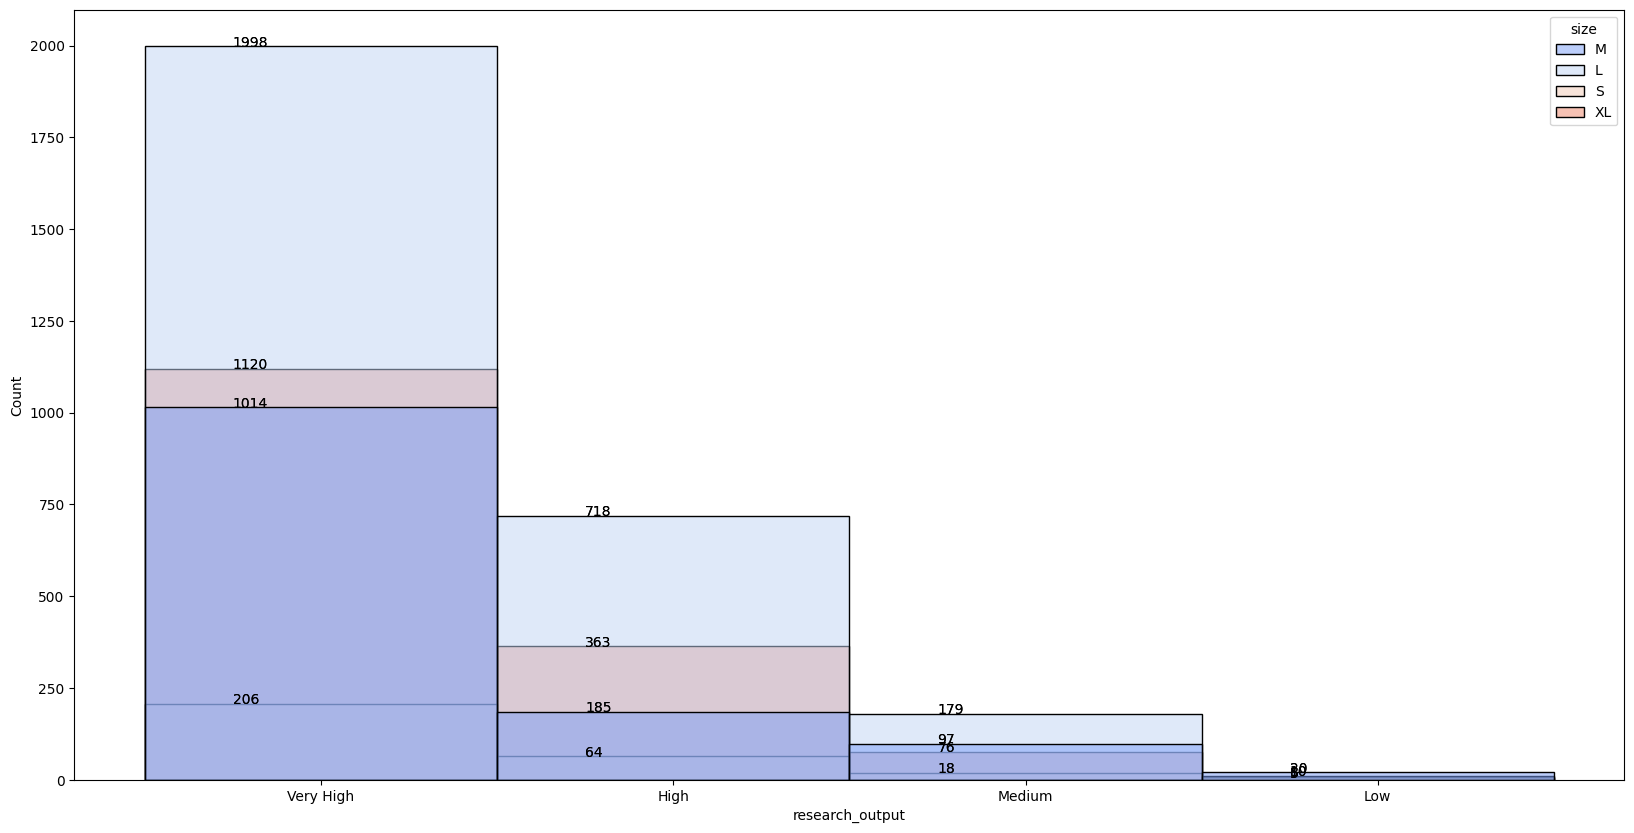

In [24]:
plt.figure(figsize=(20,10))
ax = sns.histplot(binwidth=2,
            x='research_output',
            hue='size',
            data=uniRank,
            stat="count",
            element = 'bars',
            palette='coolwarm')
sns.move_legend(ax, "upper right")

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

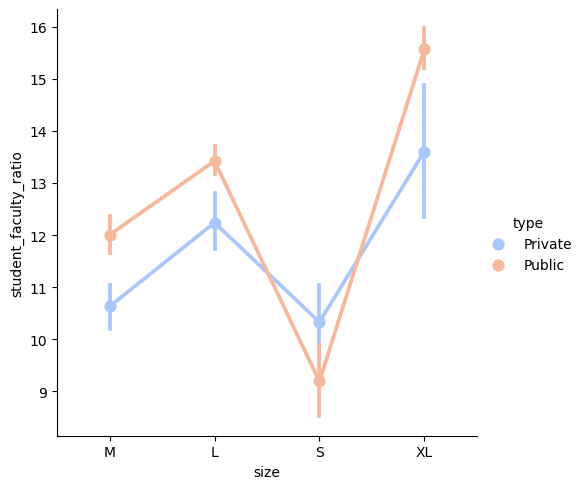

In [25]:
sns.catplot(x="size", y="student_faculty_ratio", kind="point", data=uniRank, hue='type',palette='coolwarm');

In [26]:
mostPreferredCountry = pd.DataFrame(uniRank.groupby(['country'], sort=False)['international_students'].sum().sort_values(ascending=False)[:10])
mostPreferredCountry

,international_students
country,
United States,2016897.823
United Kingdom,1885596.242
Australia,1334084.630
Canada,753231.600
Germany,629998.591
France,546821.506
Netherlands,402373.134
China (Mainland),380128.246
Japan,280854.488


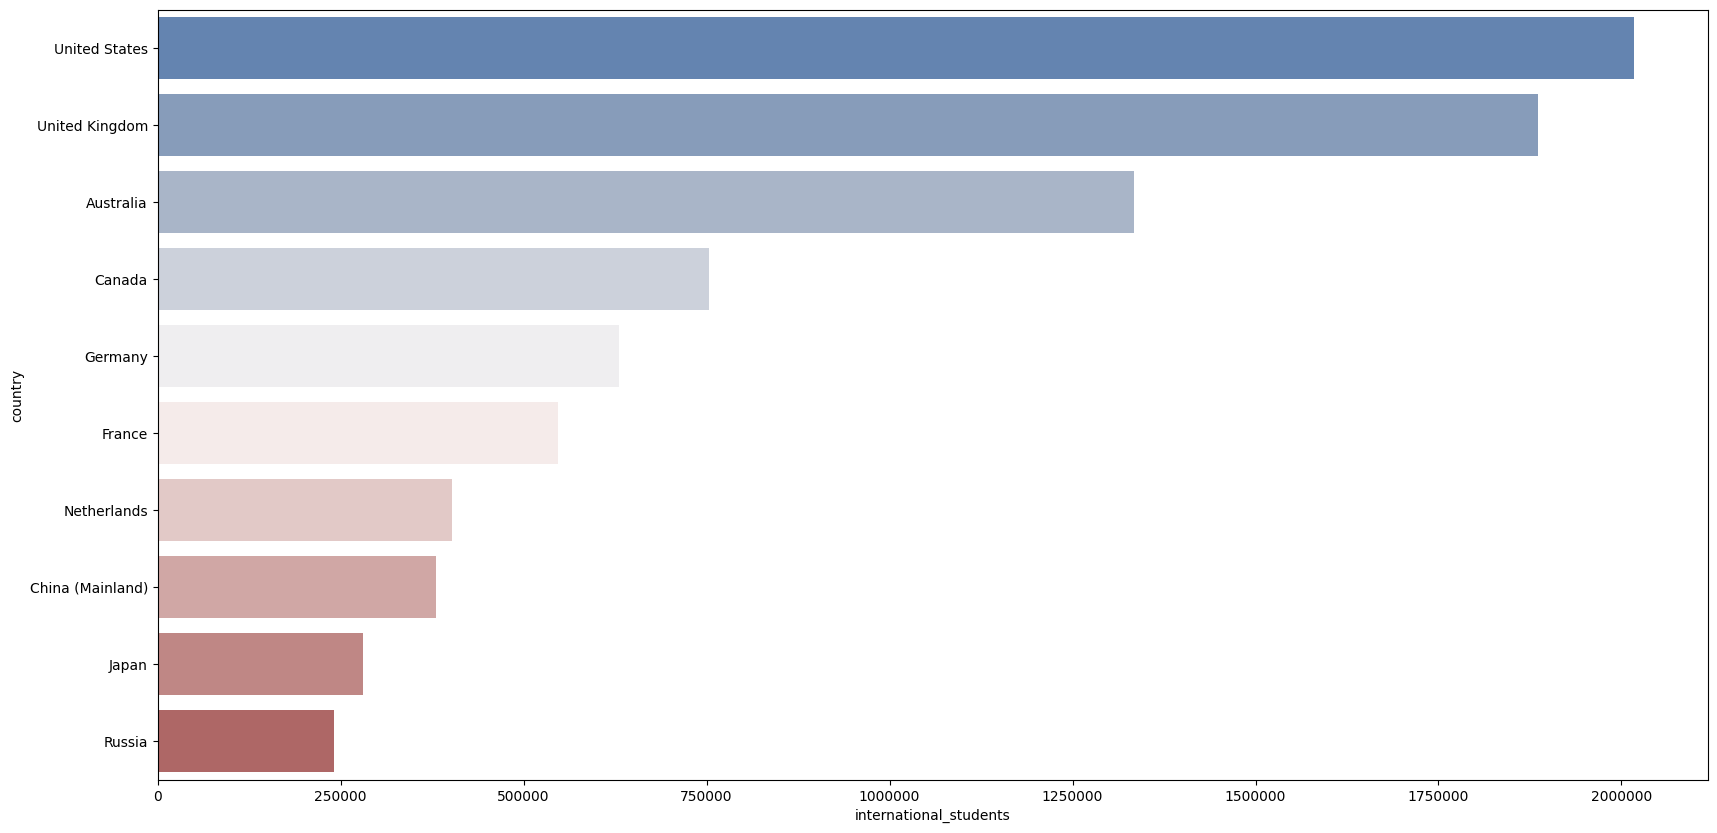

In [27]:
plt.figure(figsize=(20,10))

sns.barplot(data=mostPreferredCountry, x='international_students', y=mostPreferredCountry.index,palette='vlag');
plt.ticklabel_format(style='plain', axis='x')



In [28]:
mostPreferredCity = pd.DataFrame(uniRank.groupby(['city'], sort=False)['international_students'].sum().sort_values(ascending=False)[:10])
mostPreferredCity

,international_students
city,
London,439282.892
Sydney,336984.000
Melbourne,280869.480
Hong Kong,205188.000
Buenos Aires,201761.294
Paris,171163.575
New York City,167672.664
Toronto,165297.900
Brisbane,149623.000


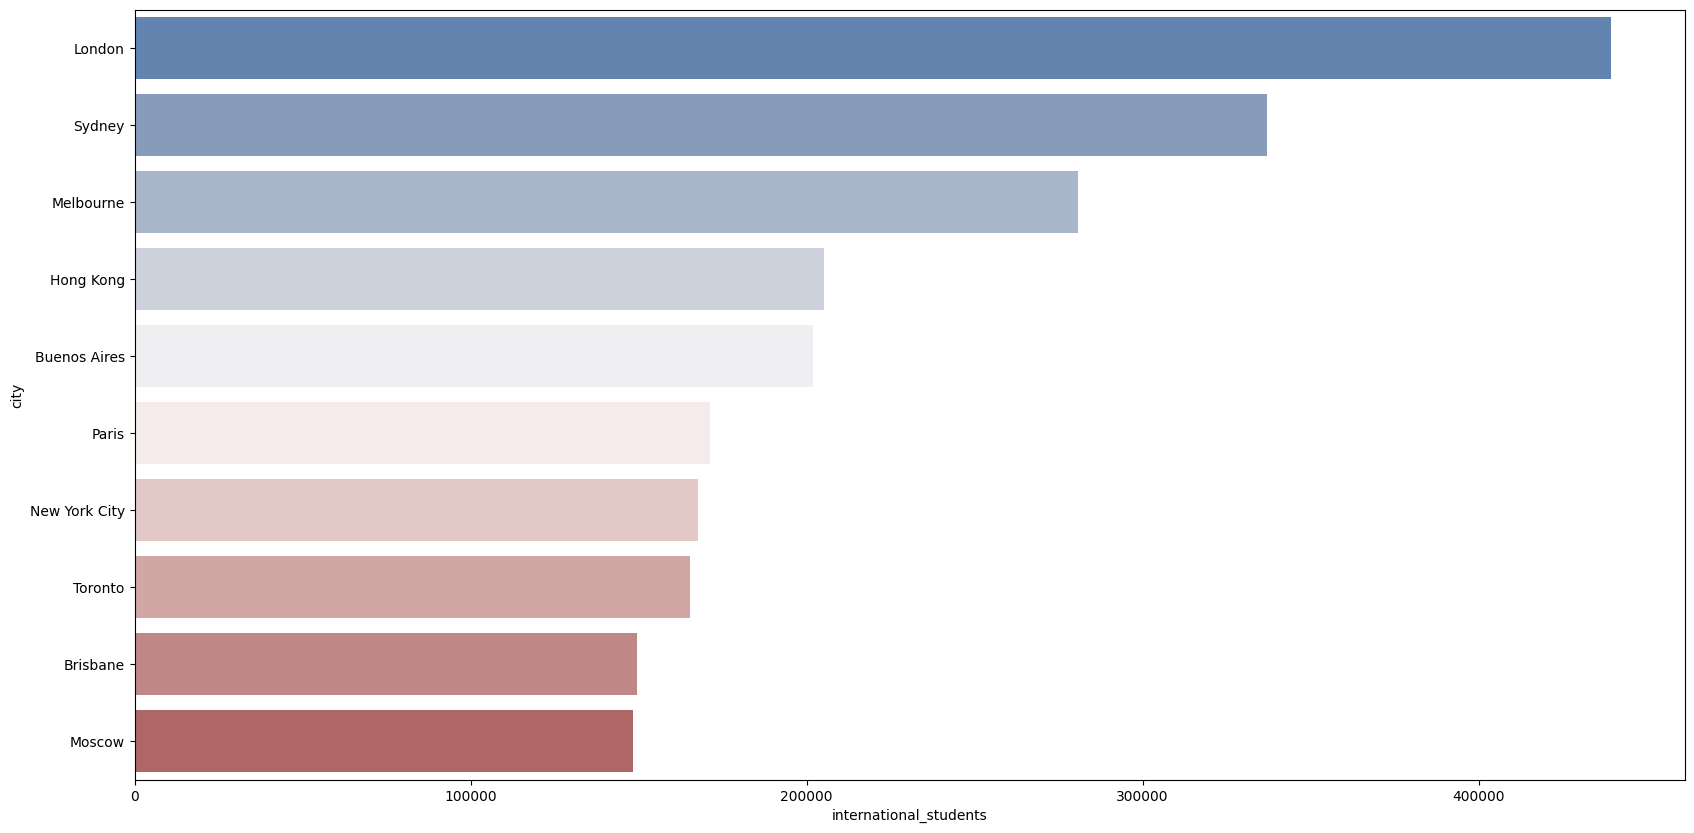

In [29]:
plt.figure(figsize=(20,10))

sns.barplot(data=mostPreferredCity, x='international_students', y=mostPreferredCity.index,palette='vlag');
plt.ticklabel_format(style='plain', axis='x')



<AxesSubplot: xlabel='type', ylabel='international_students'>

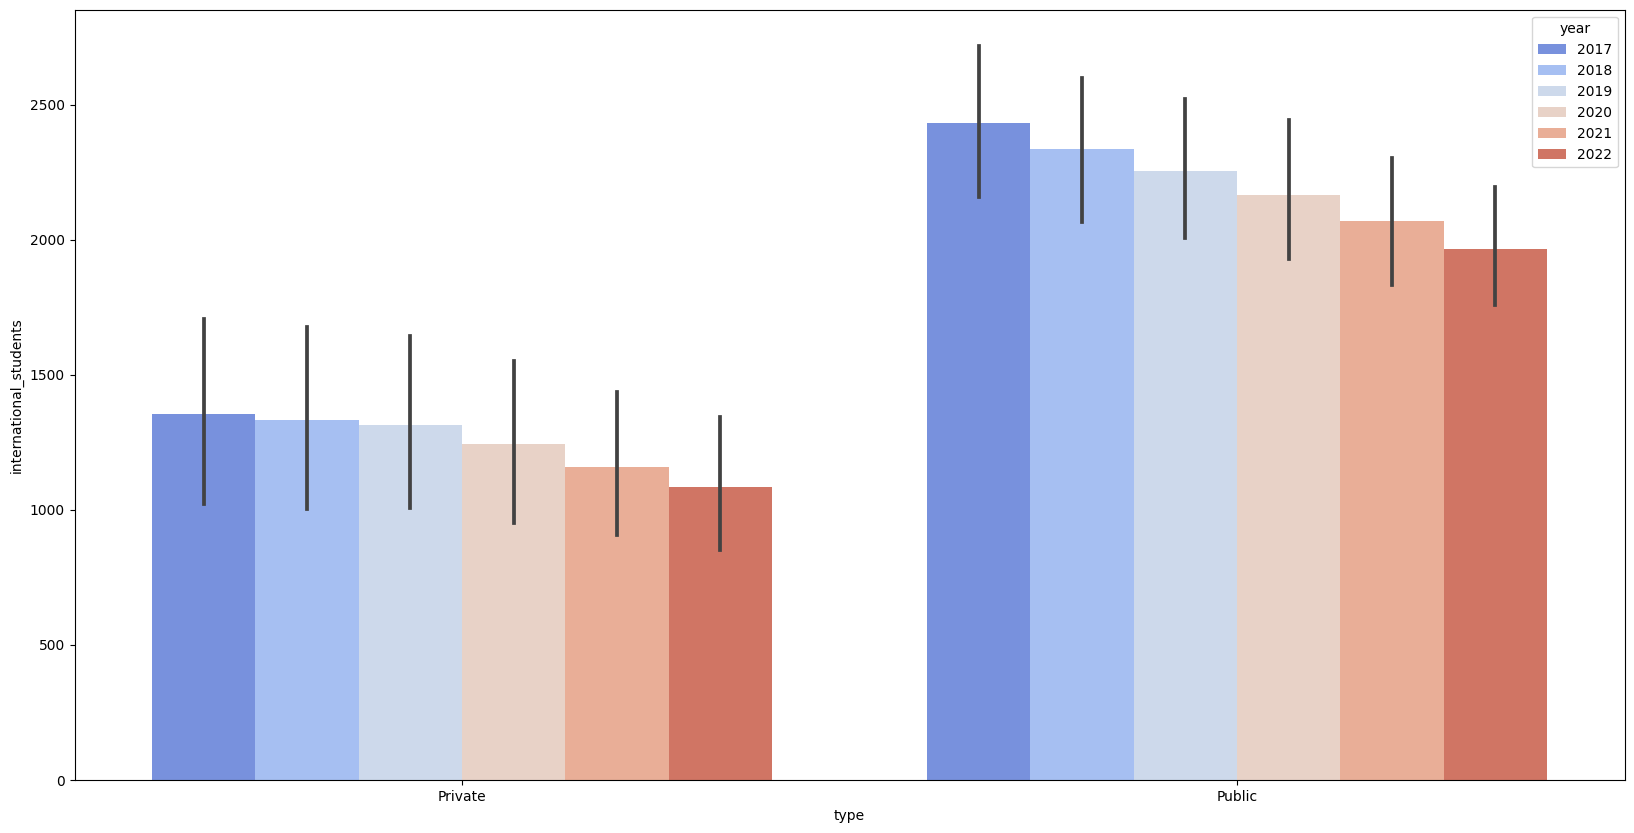

In [30]:
plt.figure(figsize=(20,10))

sns.barplot(data=uniRank,x="type", y='international_students', hue='year',palette='coolwarm')

In [31]:
uniRank['country'].nunique()

92

In [32]:
uniRank.head()

,university,year,rank_display,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1.0,United States,Cambridge,North America,Private,Very High,4.0,3730.0,M,3065.0
1,Stanford University,2017,2.0,United States,Stanford,North America,Private,Very High,3.0,3879.0,L,4725.0
2,Harvard University,2017,3.0,United States,Cambridge,North America,Private,Very High,5.0,5877.0,L,4646.0
3,University of Cambridge,2017,4.0,United Kingdom,Cambridge,Europe,Public,Very High,4.0,7925.0,L,5800.0
4,California Institute of Technology (Caltech),2017,5.0,United States,Pasadena,North America,Private,Very High,2.0,692.0,S,968.0


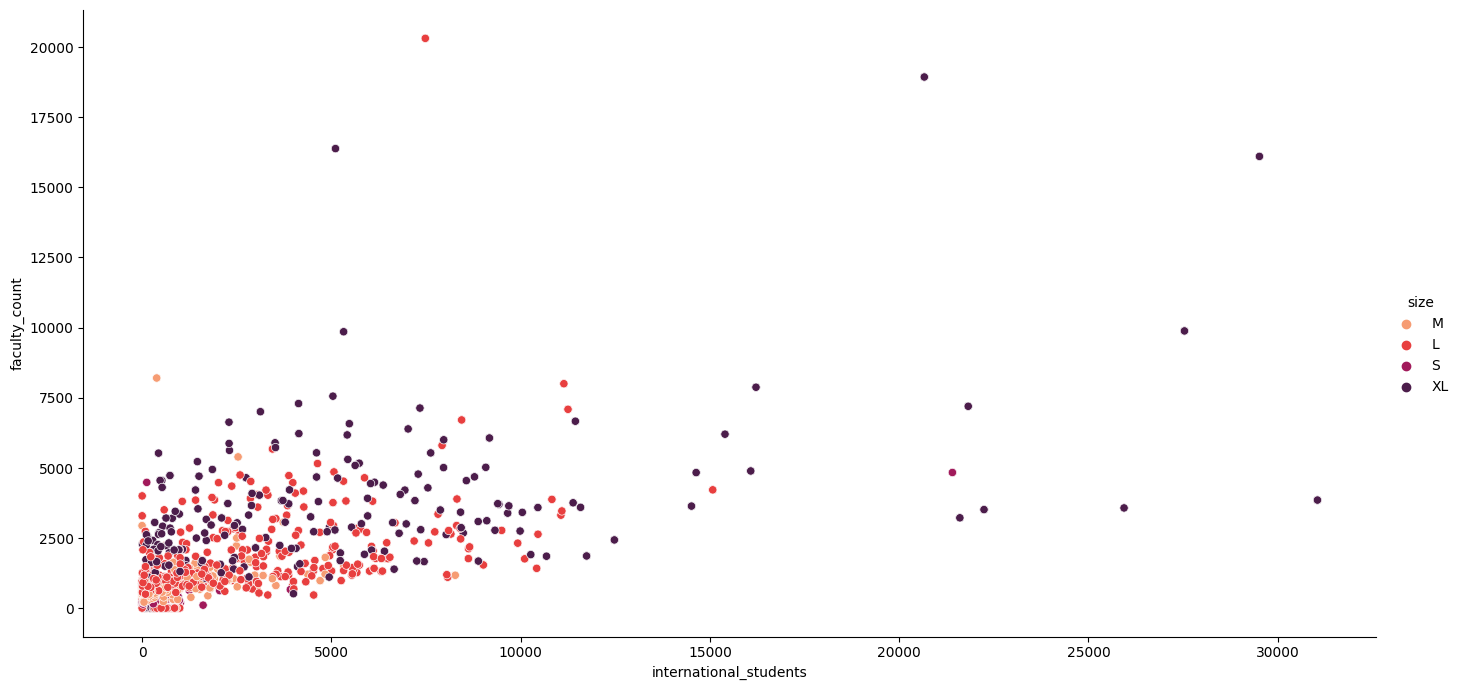

In [283]:
rel=sns.relplot(x='international_students', y='faculty_count', hue='size',kind='scatter',data=uniRank,color='red',height=7,aspect=2,palette='rocket_r')


In [33]:
uniRank.to_csv('uniRank.csv')
